# orthomap: Step 4 - TEI calculation

This notebook will demonstrate how to to add a transcriptome evolutionary index (short: TEI) to scRNA data.

## Notebook file

Notebook file can be obtained here:

[https://raw.githubusercontent.com/kullrich/orthomap/main/docs/notebooks/add_tei.ipynb](https://raw.githubusercontent.com/kullrich/orthomap/main/docs/notebooks/add_tei.ipynb)

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
# increase dpi
%matplotlib inline
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.figsize'] = [6, 4.5]
#plt.rcParams['figure.figsize'] = [4.4, 3.3]

## Import orthomap python package submodules

In [2]:
# import submodules
from orthomap import qlin, gtf2t2g, of2orthomap, orthomap2tei, datasets

## Step 0, Step 1, Step 2 and Step 3

In order to come to Step 4, TEI calculation, one needs to have the results from Step 0, Step 1, Step 2 and Step 3.

The query species in this part is: __*Danio rerio*__ (zebrafish).

Please have a look at the documentation of [Step 0 - run OrthoFinder](https://orthomap.readthedocs.io/en/latest/tutorials/orthofinder.html) to get to know what information and files are mandatory to extract gene age classes from [OrthoFinder](https://orthomap.readthedocs.io/en/latest/tutorials/https://github.com/davidemms/OrthoFinder) results.

In [Step 1 - get taxonomic information](https://orthomap.readthedocs.io/en/latest/tutorials/query_lineage.html) you have already been introduced how to extract query lineage information with `orthomap` and the `qlin.get_qlin()` function.

In [Step 2 - gene age class assignment](https://orthomap.readthedocs.io/en/latest/tutorials/get_orthomap.html) you have already been introduced how to extract an orthomap (gene age class) from [OrthoFinder](https://orthomap.readthedocs.io/en/latest/tutorials/https://github.com/davidemms/OrthoFinder) results with `orthomap` and the `of2orthomap.get_orthomap()` function or how to import pre-calculated orthomaps with the `orthomap2tei.read_orthomap()` function.

In [Step 3 - map gene/transcript IDs](https://orthomap.readthedocs.io/en/latest/tutorials/geneset_overlap.html) you have already been introduced how to extract gene IDs from `GTF` file with `orthoamp` and the `gtf2t2g.parse_gtf()` function. You have also been introduced how to use the `orthomap2tei.geneset_overlap()` function to check the overlap between the gene IDs and have learned how to use the `orthomap2tei.replace_by()` function to e.g. reduce isoform gene IDs to gene IDs.

### Step 0 - run OrthoFinder

For this documentation part all mandatory [OrthoFinder](https://orthomap.readthedocs.io/en/latest/tutorials/https://github.com/davidemms/OrthoFinder) ([Emms and Kelly, 2019](https://doi.org/10.1186/s13059-019-1832-y)) results have been pre-calculated.

Please have a look at the documentation of [Step 0 - run OrthoFinder](https://orthomap.readthedocs.io/en/latest/tutorials/orthofinder.html) to get further insides.

The results are available here: 

https://doi.org/10.5281/zenodo.7242264

or can be accessed with the `dataset` submodule of `orthomap`

`datasets.ensembl105(datapath='data')` (download folder set to `'data'`).

### Step 1 - get taxonomic information

Please have a look at the documentation of [Step 1 - get taxonomic information](https://orthomap.readthedocs.io/en/latest/tutorials/query_lineage.html) to get further insides.

In [3]:
# get query species taxonomic lineage information
query_lineage = qlin.get_qlin(q='Danio rerio')

query name: Danio rerio
query taxID: 7955
query kingdom: Eukaryota
query lineage names: 
['root(1)', 'cellular organisms(131567)', 'Eukaryota(2759)', 'Opisthokonta(33154)', 'Metazoa(33208)', 'Eumetazoa(6072)', 'Bilateria(33213)', 'Deuterostomia(33511)', 'Chordata(7711)', 'Craniata(89593)', 'Vertebrata(7742)', 'Gnathostomata(7776)', 'Teleostomi(117570)', 'Euteleostomi(117571)', 'Actinopterygii(7898)', 'Actinopteri(186623)', 'Neopterygii(41665)', 'Teleostei(32443)', 'Osteoglossocephalai(1489341)', 'Clupeocephala(186625)', 'Otomorpha(186634)', 'Ostariophysi(32519)', 'Otophysi(186626)', 'Cypriniphysae(186627)', 'Cypriniformes(7952)', 'Cyprinoidei(30727)', 'Danionidae(2743709)', 'Danioninae(2743711)', 'Danio(7954)', 'Danio rerio(7955)']
query lineage: 
[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 7898, 186623, 41665, 32443, 1489341, 186625, 186634, 32519, 186626, 186627, 7952, 30727, 2743709, 2743711, 7954, 7955]


### Step 2 - gene age class assignment

Here, `orthomap` use the query species information and [OrthoFinder](https://orthomap.readthedocs.io/en/latest/tutorials/https://github.com/davidemms/OrthoFinder) results to extract the oldest common tree node per orthogroup along a species tree and to assign this node as the gene age to the corresponding genes.

Please have a look at the documentation of [Step 2 - gene age class assignment](https://orthomap.readthedocs.io/en/latest/tutorials/get_orthomap.html) to get further insides.

### Step 3 - map gene/transcript IDs

To be able to link gene ages assignments from an orthomap and gene or transcript of scRNA dataset, one needs to check the overlap of the annotated gene names. With the `gtf2t2g` submodule of `orthomap` and the `gtf2t2g.parse_gtf()` function, one can extract gene and transcript names from a given gene feature file (`GTF`).

Please have a look at the documentation of [Step 3 - map gene/transcript IDs](https://orthomap.readthedocs.io/en/latest/tutorials/geneset_overlap.html) to get further insides.

Here, the pre-calculated orthomap from *Danio rerio* (zebrafish) obtained via Step 0, Step 1, Step 2 and Step 3 is loaded as follows:

In [5]:
# get query species orthomap

# download zebrafish orthomap results here: https://doi.org/10.5281/zenodo.7242264
# or download with datasets.zebrafish_ensembl_105_orthomap('data')
datasets.zebrafish_orthomap(datapath='data')
query_orthomap = orthomap2tei.read_orthomap('data/zebrafish_ensembl_105_orthomap.tsv')
query_orthomap

100% [..........................................................................] 1920563 / 1920563

,seqID,Orthogroup,PSnum,PStaxID,PSname,PScontinuity,geneID
0,ENSDART00000127643.3,OG0000000,6,33213,Bilateria,0.846154,ENSDARG00000087544
1,ENSDART00000171750.2,OG0000000,6,33213,Bilateria,0.846154,ENSDARG00000095745
2,ENSDART00000190648.1,OG0000000,6,33213,Bilateria,0.846154,ENSDARG00000097551
3,ENSDART00000130167.3,OG0000001,10,7742,Vertebrata,0.909091,ENSDARG00000086420
4,ENSDART00000150909.2,OG0000001,10,7742,Vertebrata,0.909091,ENSDARG00000086613
...,...,...,...,...,...,...,...
25167,ENSDART00000180796.1,OG0029510,19,186625,Clupeocephala,0.400000,ENSDARG00000110427
25168,ENSDART00000145618.2,OG0029511,19,186625,Clupeocephala,0.400000,ENSDARG00000093188
25169,ENSDART00000143229.2,OG0029512,29,7955,Danio rerio,1.000000,ENSDARG00000069978
25170,ENSDART00000143837.3,OG0029512,29,7955,Danio rerio,1.000000,ENSDARG00000078193


### Import now, the scRNA dataset of the query species

Here, data is used, like in the publication ([Farrell et al., 2018](https://doi.org/10.1126/science.aar3131); [Wagner et al., 2018](https://doi.org/10.1126/science.aar4362); [Qiu et al., 2022](https://doi.org/10.1038/s41588-022-01018-x)).

scRNA data was downloaded from http://tome.gs.washington.edu/ as R rds files, combined into a single Seurat object and converted into loom and AnnData (h5ad) files to be able to analyse with e.g. python scanpy or orthomap package and is available here:

https://doi.org/10.5281/zenodo.7243602

or can be accessed with the `dataset` submodule of `orthomap`:

`datasets.qiu22_zebrafish(datapath='data')` (download folder set to `'data'`).

In [6]:
# load scRNA data

# download zebrafish scRNA data here: https://doi.org/10.5281/zenodo.7243602
# or download with datasets.qui22_zebrafish(datapath='data')

#zebrafish_data = datasets.qiu22_zebrafish(datapath='data')
zebrafish_data = sc.read('data/zebrafish_data.h5ad')

## Step 4 - Get TEI values and add them to scRNA dataset

Since now the gene names correspond to each other in the orthomap and the scRNA `adata` object, one can calculate the transcriptome evolutionary index (`TEI`) and add them to the scRNA dataset (`adata` object).

The `TEI` measure represents the weighted arithmetic mean (expression levels as weights for the phylostratum value) over all evolutionary age categories denoted as _phylostra_.

${TEI_s = \sum (e_is * ps_i) / \sum e_is}$

, where ${TEI_s}$ denotes the `TEI` value in developmental stage ${s, e_is}$ denotes the gene expression level of gene ${i}$ in stage ${s}$, and ${ps_i}$ denotes the corresponding phylostratum of gene ${i, i = 1,...,N}$ and ${N = total\ number\ of\ genes}$.

Note: If e.g. two different isoforms would fall into two different gene age classes, their gene ages might differ based on the oldest ortholog found in their corresponding orthologous groups. However, both isoforms share the same gene name and their gene ages would clash. In this case one can decide either to use the `keep='min'` or `keep='max'` gene age to be kept by the `get_tei` function, which defaults to keep in this cases the `keep='min'` or in other words the 'older' gene age.

To be able to re-use the original `count` data, they are added as a new `layer` to the `adata` object. This is useful because later on the `count` data can be used to extract either the relative expression per gene age class or re-calculate other metrics. 

This can be done either on un-normalized `counts`, on `normalized` and `log-transformed` data.

In [7]:
zebrafish_data.layers['counts'] = zebrafish_data.X

### add TEI to adata object

Using the submodule `orthomap2tei` from `orthomap` and the `orthomap2tei.get_tei()` function, transcriptome evolutionary index (`TEI`) values are calculated and directyl added to the existing `adata` object (`add_obs=True`).

There are other options to e.g. not start from the `adata.X` `counts` but from another `layer` from the `adata` object, the default is to use the `adata.X` (`layer=None`). The values can be pre-processed by the `normalize_total` option and the `log1p` option.

If `add_obs=True` the resulting `TEI` values are added to the existing `adata` object as a new observation with the name set with the `obs_name` option.

If `add_var=True` the gene age values are added to the existing `adata` object as a new variable with the name set with the `var_name` option.

__Note:__ Genes not assigned to any gene class will get a missing assignment.

If one wants to calculate bootstrap `TEI` values per cell, the `boot` option can be set to `boot=True` and gene age classes will be randomly chosen prior calculating `TEI` values `bt=10` times.

In [8]:
# add TEI values to existing adata object
orthomap2tei.get_tei(adata=zebrafish_data,
    gene_id=query_orthomap['geneID'],
    gene_age=query_orthomap['PSnum'],
    keep='min',
    layer=None,
    add_var=True,
    var_name='Phylostrata',
    add_obs=True,
    obs_name='tei',
    boot=False,
    bt=10,
    normalize_total=False,
    log1p=False,
    target_sum=1e6)

,tei
hpf3.3_ZFHIGH_WT_DS5_AAAAGTTGCCTC,5.505133
hpf3.3_ZFHIGH_WT_DS5_AAACAAGTGTAT,5.617787
hpf3.3_ZFHIGH_WT_DS5_AAACACCTCGTC,5.529483
hpf3.3_ZFHIGH_WT_DS5_AAATGAGGTTTN,5.534573
hpf3.3_ZFHIGH_WT_DS5_AACCCTCTCGAT,5.522015
...,...
hpf24_DEW057_TGACACAACAG_GCCACATC,4.767233
hpf24_DEW057_CTTACGGG_AACCTGAC,4.570813
hpf24_DEW057_TGAACATCTAT_GACGATGG,4.630186
hpf24_DEW057_TGAGGTTTCTC_CTCAGAAT,4.324623


In the `adata` object, for each cell there is now a new variable called `tei`, which can be used in downstream analysis.

Once the gene age data has been added to the scRNA dataset, one can e.g. plot the corresponding transcriptome evolutionary index (`TEI`) values by any given observation pre-defined in the scRNA dataset.

### Boxplot gene age class per embryo stage

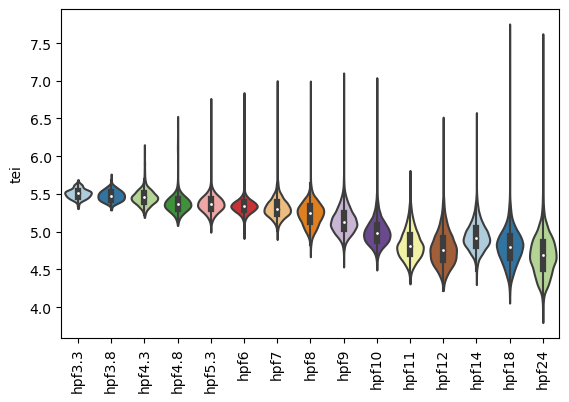

In [9]:
sc.pl.violin(adata=zebrafish_data,
             keys=['tei'],
             groupby='stage',
             rotation=90,
             palette='Paired',
             stripplot=False,
             inner='box')

Please have a look at the documentation of [Downstream analysis](https://orthomap.readthedocs.io/en/latest/tutorials/index.html#orthomap-downstream-analysis) to get further insides.